In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
df = pd.read_csv("D:\ML projects\churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

df["gender"] = df["gender"].map({"Female": 0,"Male": 1})



<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\MUET\AppData\Local\Temp\ipykernel_14328\372334412.py:6: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\ML projects\churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")


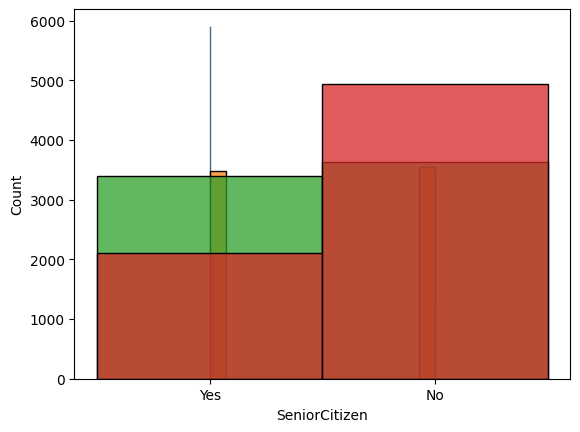

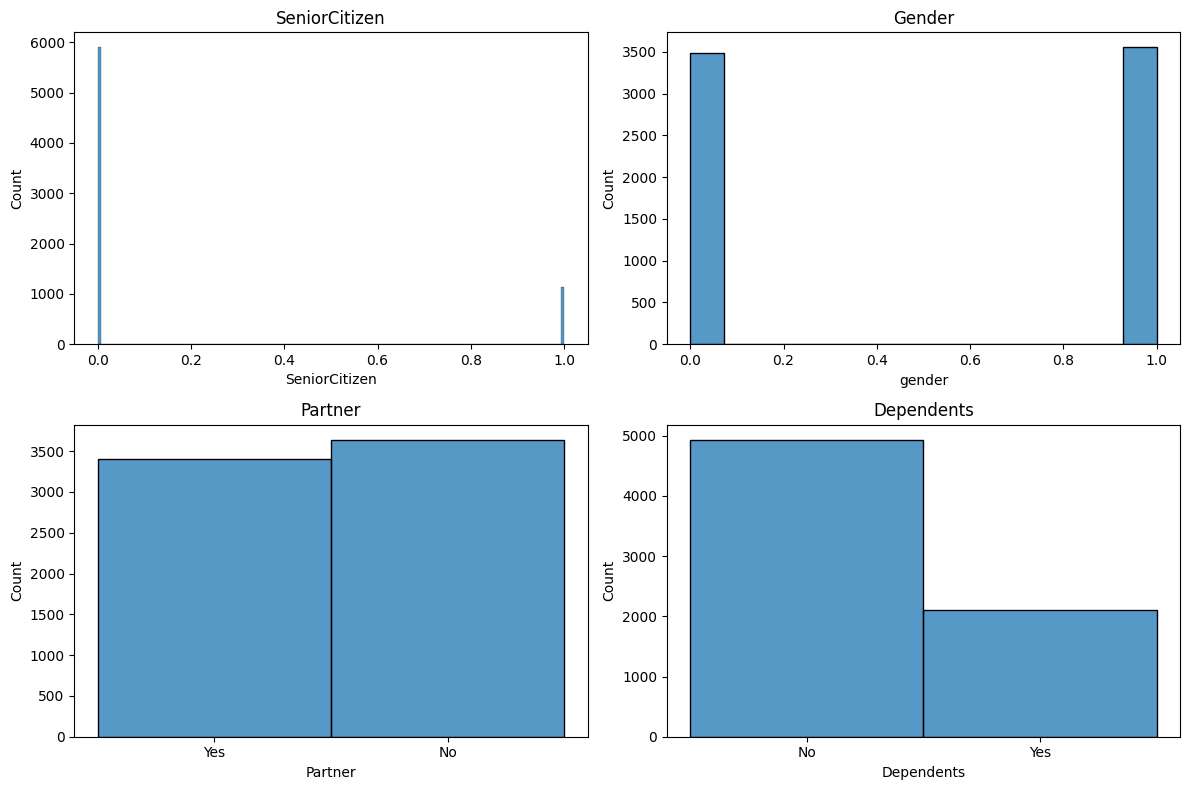

In [2]:

df["SeniorCitizen"].value_counts()
sns.histplot(x="SeniorCitizen", data=df)


sns.histplot(x="gender", data=df)
sns.histplot(x="Partner", data=df)
sns.histplot(x="Dependents", data=df)


# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each histogram
sns.histplot(x="SeniorCitizen", data=df, ax=axes[0, 0])
axes[0, 0].set_title("SeniorCitizen")

sns.histplot(x="gender", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Gender")

sns.histplot(x="Partner", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Partner")

sns.histplot(x="Dependents", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Dependents")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


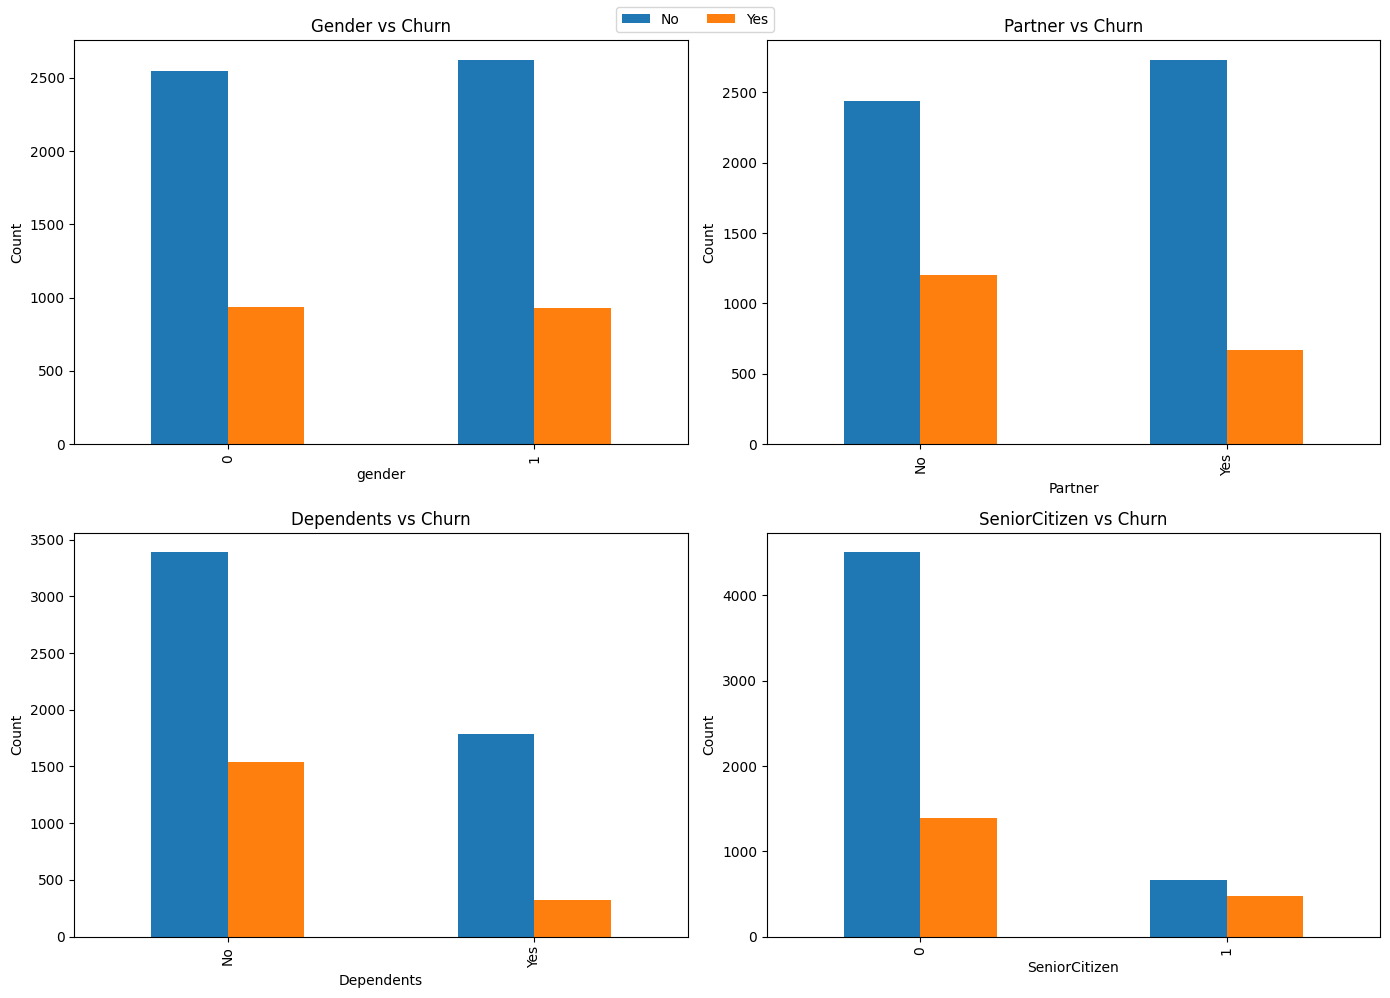

In [3]:


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pivot tables and plots
pivot1 = pd.crosstab(df["gender"], df["Churn"])
pivot1.plot(kind="bar", ax=axes[0, 0], legend=False)
axes[0, 0].set_title("Gender vs Churn")
axes[0, 0].set_ylabel("Count")

pivot2 = pd.crosstab(df["Partner"], df["Churn"])
pivot2.plot(kind="bar", ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Partner vs Churn")
axes[0, 1].set_ylabel("Count")

pivot3 = pd.crosstab(df["Dependents"], df["Churn"])
pivot3.plot(kind="bar", ax=axes[1, 0], legend=False)
axes[1, 0].set_title("Dependents vs Churn")
axes[1, 0].set_ylabel("Count")

pivot4 = pd.crosstab(df["SeniorCitizen"], df["Churn"])
pivot4.plot(kind="bar", ax=axes[1, 1], legend=False)
axes[1, 1].set_title("SeniorCitizen vs Churn")
axes[1, 1].set_ylabel("Count")

# Adjust layout and add legend once
plt.tight_layout()
fig.legend(labels=pivot1.columns, loc="upper center", ncol=len(pivot1.columns))
plt.show()



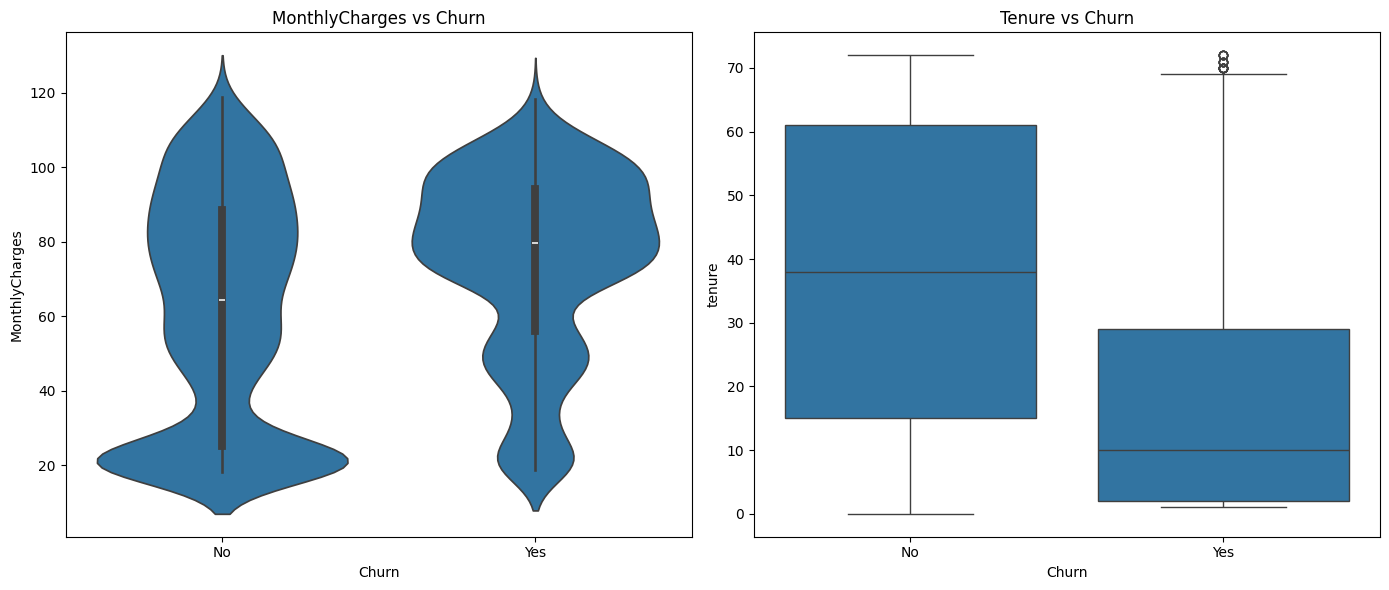

In [4]:


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violinplot: MonthlyCharges vs Churn
sns.violinplot(x="Churn", y="MonthlyCharges", data=df, ax=axes[0])
axes[0].set_title("MonthlyCharges vs Churn")

# Boxplot: tenure vs Churn
sns.boxplot(x="Churn", y="tenure", data=df, ax=axes[1])
axes[1].set_title("Tenure vs Churn")

# Adjust layout
plt.tight_layout()
plt.show()


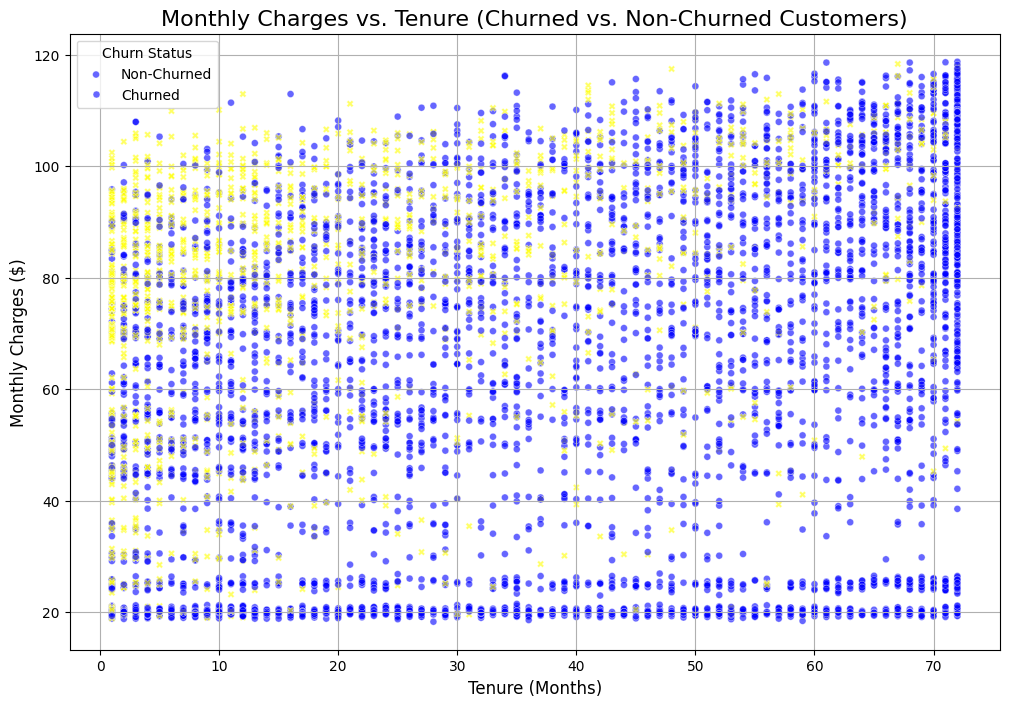

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    style='Churn',
    palette=['blue', 'yellow'], # Use red for churned, blue for non-churned
    s=25, # Point size
    alpha=0.6 # Transparency
)

# Set the title and axis labels
plt.title('Monthly Charges vs. Tenure (Churned vs. Non-Churned Customers)', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)

# Add a legend for clarity
plt.legend(title='Churn Status', labels=['Non-Churned', 'Churned'])

# Show the plot
plt.grid(True)
plt.show()


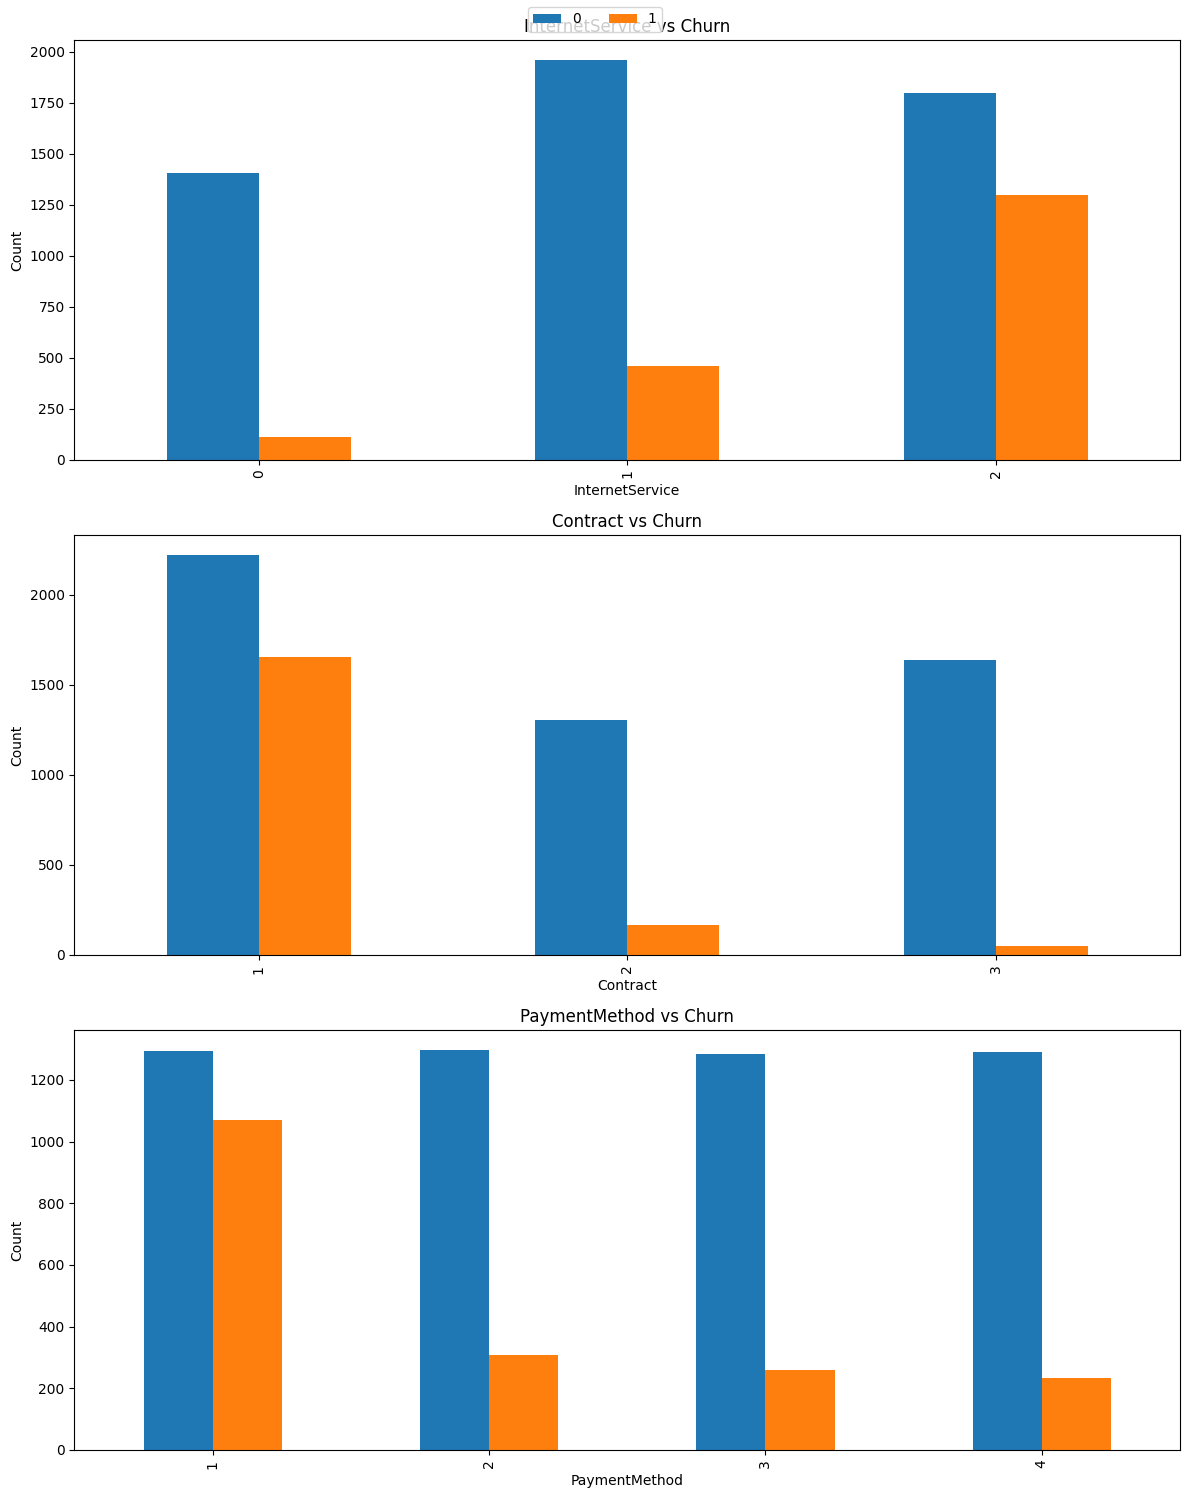

In [ ]:

# Create subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# InternetService vs Churn
pivot1 = pd.crosstab(df["InternetService"], df["Churn"])
pivot1.plot(kind="bar", ax=axes[0], legend=False)
axes[0].set_title("InternetService vs Churn")
axes[0].set_ylabel("Count")

# Contract vs Churn
pivot2 = pd.crosstab(df["Contract"], df["Churn"])
pivot2.plot(kind="bar", ax=axes[1], legend=False)
axes[1].set_title("Contract vs Churn")
axes[1].set_ylabel("Count")

# PaymentMethod vs Churn
pivot3 = pd.crosstab(df["PaymentMethod"], df["Churn"])
pivot3.plot(kind="bar", ax=axes[2], legend=False)
axes[2].set_title("PaymentMethod vs Churn")
axes[2].set_ylabel("Count")

# Adjust layout and add one shared legend
plt.tight_layout()
fig.legend(labels=pivot1.columns, loc="upper center", ncol=len(pivot1.columns))
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_18880\1614851509.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"Yes": 1, "No": 0, "No internet service": 0})


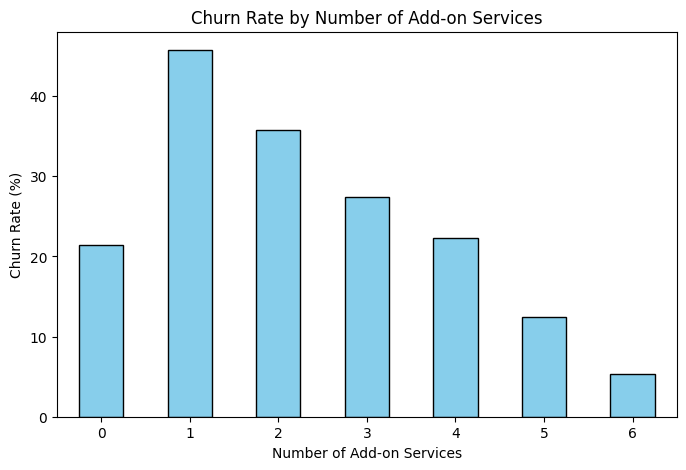


Churn Rate by Service (Yes vs No):
                    Yes     No
OnlineBackup      21.57  29.22
OnlineSecurity    14.64  31.37
StreamingMovies   29.95  24.44
StreamingTV       30.11  24.37
DeviceProtection  22.54  28.70
TechSupport       15.20  31.23


In [ ]:
# Convert Churn to numeric
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

services = ["OnlineBackup","OnlineSecurity","StreamingMovies",
            "StreamingTV","DeviceProtection","TechSupport"]

for col in services:
    df[col] = df[col].replace({"Yes": 1, "No": 0, "No internet service": 0})

# Count number of services per customer
df["ServiceCount"] = df[services].sum(axis=1)

# Analysis 1: Churn rate by ServiceCount
churn_by_count = df.groupby("ServiceCount")["Churn"].mean() * 100

plt.figure(figsize=(8,5))
churn_by_count.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Churn Rate by Number of Add-on Services")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Number of Add-on Services")
plt.xticks(rotation=0)
plt.show()

#Analysis 2: Individual service impact 
service_churn = {}
for col in services:
    churn_rate_yes = df[df[col] == 1]["Churn"].mean() * 100
    churn_rate_no = df[df[col] == 0]["Churn"].mean() * 100
    service_churn[col] = {"Yes": churn_rate_yes, "No": churn_rate_no}

# Convert to DataFrame for better view
service_churn_df = pd.DataFrame(service_churn).T
print("\nChurn Rate by Service (Yes vs No):")
print(service_churn_df.round(2))



CLV summary by churn status (0 = retained, 1 = churned):
       count     mean   median      std
Churn                                  
0       5163  2555.20  1691.75  2327.90
1       1869  1531.61   700.00  1886.77


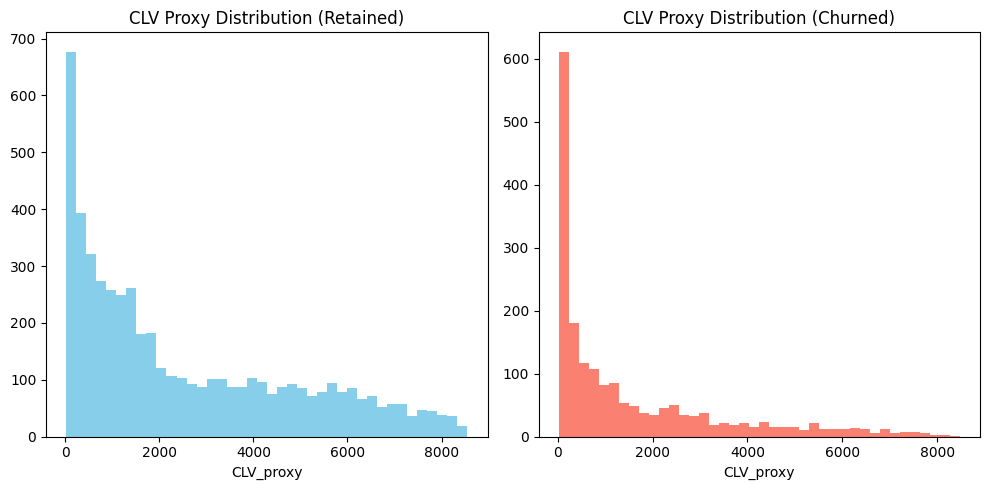

C:\Users\Hp\AppData\Local\Temp\ipykernel_18880\768729367.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["Churn"]==0]["CLV_proxy"].dropna(),


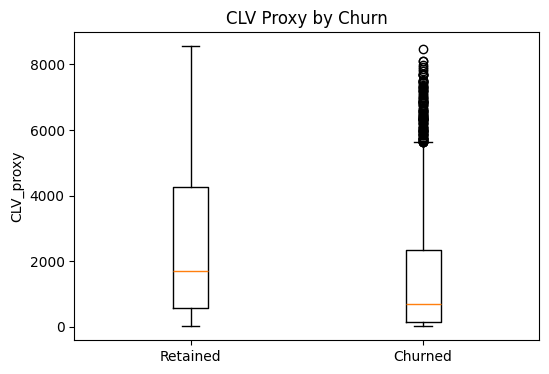


T-test: t=18.832, p=6.621e-76


In [ ]:

from scipy import stats


# Estimate Customer Lifetime Value (CLV proxy)
df["CLV_proxy"] = df["MonthlyCharges"] * df["tenure"]


# Compare churned vs retained
clv_summary = df.groupby("Churn")["CLV_proxy"].agg(["count", "mean", "median", "std"])
print("\nCLV summary by churn status (0 = retained, 1 = churned):")
print(clv_summary.round(2))

# Histograms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df[df["Churn"]==0]["CLV_proxy"].dropna(), bins=40, color="skyblue")
plt.title("CLV Proxy Distribution (Retained)")
plt.xlabel("CLV_proxy")

plt.subplot(1,2,2)
plt.hist(df[df["Churn"]==1]["CLV_proxy"].dropna(), bins=40, color="salmon")
plt.title("CLV Proxy Distribution (Churned)")
plt.xlabel("CLV_proxy")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot([df[df["Churn"]==0]["CLV_proxy"].dropna(),
             df[df["Churn"]==1]["CLV_proxy"].dropna()],
            labels=["Retained","Churned"])
plt.ylabel("CLV_proxy")
plt.title("CLV Proxy by Churn")
plt.show()

# Statistical test
ret = df[df["Churn"]==0]["CLV_proxy"].dropna()
chd = df[df["Churn"]==1]["CLV_proxy"].dropna()
tstat, pval = stats.ttest_ind(ret, chd, equal_var=False)
print(f"\nT-test: t={tstat:.3f}, p={pval:.3e}")